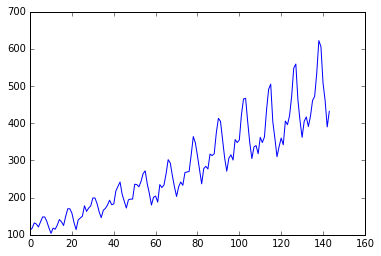

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
plt.plot(dataset)
plt.show()

In [2]:
np.random.seed(7)
from sklearn.preprocessing import MinMaxScaler

#load_dataset
df = pd.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = df.values
dataset = dataset.astype('float32')

#normalize the dataset
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

#split dataset into train and test sets
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print(len(train), len(test))

(100, 44)


In [3]:
def create_dataset(ds, look_back=1):
    dx, dy = [], []
    for i in range(len(ds)-look_back-1):
        a = ds[i:(i+look_back), 0]
        dx.append(a)
        dy.append(ds[i+look_back, 0])
    return np.array(dx), np.array(dy)

look_back = 1
trainx, trainy = create_dataset(train, look_back)
testx, testy = create_dataset(test, look_back)

trainx = np.reshape(trainx, (trainx.shape[0], 1, trainx.shape[1]))
testx = np.reshape(testx, (testx.shape[0], 1, testx.shape[1]))

In [4]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error

#create and fit the LSTM
model = Sequential()
model.add(LSTM(4, input_dim=look_back))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainx, trainy, nb_epoch=100, batch_size=1, verbose=2)

Using Theano backend.
ERROR (theano.sandbox.cuda): nvcc compiler not found on $PATH. Check your nvcc installation and try again.


Epoch 1/100
0s - loss: 0.0484
Epoch 2/100
0s - loss: 0.0237
Epoch 3/100
0s - loss: 0.0166
Epoch 4/100
0s - loss: 0.0147
Epoch 5/100
0s - loss: 0.0137
Epoch 6/100
0s - loss: 0.0127
Epoch 7/100
0s - loss: 0.0117
Epoch 8/100
0s - loss: 0.0106
Epoch 9/100
0s - loss: 0.0092
Epoch 10/100
0s - loss: 0.0078
Epoch 11/100
0s - loss: 0.0065
Epoch 12/100
0s - loss: 0.0052
Epoch 13/100
0s - loss: 0.0041
Epoch 14/100
0s - loss: 0.0033
Epoch 15/100
0s - loss: 0.0028
Epoch 16/100
0s - loss: 0.0025
Epoch 17/100
0s - loss: 0.0024
Epoch 18/100
0s - loss: 0.0023
Epoch 19/100
0s - loss: 0.0022
Epoch 20/100
0s - loss: 0.0022
Epoch 21/100
0s - loss: 0.0022
Epoch 22/100
0s - loss: 0.0022
Epoch 23/100
0s - loss: 0.0022
Epoch 24/100
0s - loss: 0.0022
Epoch 25/100
0s - loss: 0.0021
Epoch 26/100
0s - loss: 0.0022
Epoch 27/100
0s - loss: 0.0021
Epoch 28/100
0s - loss: 0.0022
Epoch 29/100
0s - loss: 0.0020
Epoch 30/100
0s - loss: 0.0022
Epoch 31/100
0s - loss: 0.0022
Epoch 32/100
0s - loss: 0.0021
Epoch 33/100
0s -

In [6]:
import math

trainPredict = model.predict(trainx)
testPredict = model.predict(testx)

trainPredict = scaler.inverse_transform(trainPredict)
trainy = scaler.inverse_transform([trainy)
testPredict = scaler.inverse_transform(testPredict)
testy = scaler.inverse_transform(testy)

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:377: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:377: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


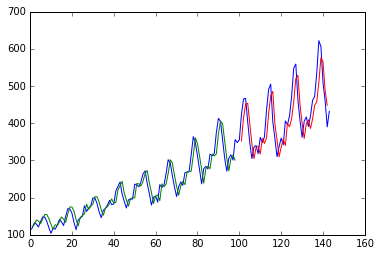

In [7]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict) + look_back, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (look_back * 2) + 1: len(dataset)-1, :] = testPredict

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()